<a href="https://colab.research.google.com/github/shakshi-k/My_projects/blob/Main-Projects/Digit_sign_language_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Upload zip file
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
# Step 2: Unzip uploaded file
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['archive (2).zip']), 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')  # This creates and extracts to 'extracted_folder'


In [ ]:
# Step 3: Check extracted folders
import os
os.listdir('extracted_folder')

['X.npy', 'Y.npy', 'Sign-language-digits-dataset']

In [ ]:
# Step 4: Import libraries for model
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Step 5: Prepare data generators (change folder path according to your dataset structure)
X = np.load('extracted_folder/X.npy')  # Your input features (e.g., images)
Y = np.load('extracted_folder/Y.npy')  # Your labels (e.g., sign classes)

print(f"Input shape: {X.shape}")
print(f"Labels shape: {Y.shape}")

Input shape: (2062, 64, 64)
Labels shape: (2062, 10)


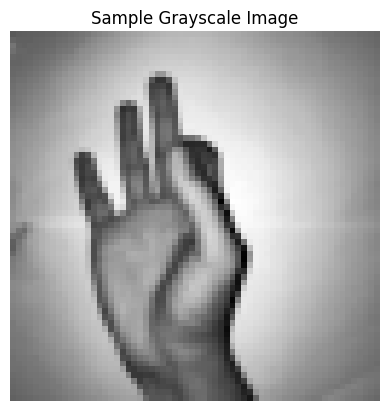

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select an image to display, e.g., the first one
image = X[0]

plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title("Sample Grayscale Image")
plt.axis('off')  # Hide axis ticks
plt.show()


In [39]:
X = np.reshape(X, (X.shape[0], 64, 64, 1))

In [40]:
# Step 6: Build CNN model

# 1. Add channel dimension to X for grayscale images
X = X[..., np.newaxis]  # Now shape: (2062, 64, 64, 1)

print("New input shape:", X.shape)  # Should print (2062, 64, 64, 1)

# 2. Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Helps prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Because labels are one-hot
              metrics=['accuracy'])

# 4. Train the model
model.fit(X, Y, epochs=30, batch_size=32, validation_split=0.2, verbose = 0)

model.summary()

New input shape: (2062, 64, 64, 1, 1)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 62, 62, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,108,000 (8.04 MB)

 Trainable params: 702,666 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,405,334 (5.36 MB)

In [41]:
model.save('model.keras')  # saves model to Keras 3 native format


In [43]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
import tensorflow as tf

# Load your model
model = tf.keras.models.load_model('model.keras')  # Change path if needed

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

def preprocess_frame_from_file(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    resized = cv2.resize(img, (64, 64))
    normalized = resized.astype('float32') / 255.0
    img_expanded = np.expand_dims(normalized, axis=-1)
    img_batch = np.expand_dims(img_expanded, axis=0)
    return img_batch

# Capture image from webcam (in Colab)
filename = take_photo()
print(f"Saved to {filename}")

# Preprocess captured image
input_img = preprocess_frame_from_file(filename)

# Predict
preds = model.predict(input_img)
class_index = np.argmax(preds[0])
confidence = preds[0][class_index]
class_label = class_names[class_index]

print(f"Prediction: {class_label} with confidence {confidence*100:.2f}%")


<IPython.core.display.Javascript object>

Saved to photo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediction: 7 with confidence 85.22%
